# **Tarea 3 - Word Embeddings 📚**

**Integrantes:** Louise Schmidt, Sebastián Urbina

**Fecha límite de entrega 📆:** 28 de mayo.

**Tiempo estimado de dedicación: 8 horas**


**Instrucciones:**
- El ejercicio consiste en:
    - Responder preguntas relativas a los contenidos vistos en los vídeos y slides de las clases. 
    - Entrenar Word2Vec y FastText sobre un pequeño corpus.
    - Evaluar los embeddings obtenidos en una tarea de clasificación.
- La tarea se realiza en grupos de **máximo** 2 personas. Puede ser invidivual pero no es recomendable.
- La entrega es a través de u-cursos a más tardar el día estipulado arriba. No se aceptan atrasos.
- El formato de entrega es este mismo Jupyter Notebook.
- Al momento de la revisión tu código será ejecutado. Por favor verifica que tu entrega no tenga errores de compilación. 
- En el horario de auxiliar pueden realizar consultas acerca de la tarea a través del canal de Discord del curso. 


**Referencias**

Vídeos: 

- [Linear Models](https://youtu.be/zhBxDsNLZEA)
- [Neural Networks](https://youtu.be/oHZHA8h2xN0)
- [Word Embeddings](https://youtu.be/wtwUsJMC9CA)

## **Preguntas teóricas 📕 (3 puntos).** ##
Para estas preguntas no es necesario implementar código, pero pueden utilizar pseudo código.

### **Parte 1: Modelos Lineales (1.5 ptos)**

Suponga que tiene un dataset de 10.000 documentos etiquetados por 4 categorías: política, deporte, negocios y otros. 

**Pregunta 1**: Diseñe un modelo lineal capaz de clasificar un documento según estas categorías donde el output sea un vector con una distribución de probabilidad con la pertenencia a cada clase. 

Especifique: representación de los documentos de entrada, parámetros del modelo, transformaciones necesarias para obtener la probabilidad de cada etiqueta y función de pérdida escogida. **(0.75 puntos)**

**Respuesta**: Las funciones lineales son una familia, o hypothesis class, que cuentan con determinadas características. Se tiene la función lineal $f( \vec{x})= \vec{x} \cdot W + \vec{b}$ donde el vector $\vec{x}$ es el input que contiene una colección de inputs, en este caso $\vec{x}_{[i]}=\vec{x}_{p},\vec{x}_{d}, \vec{x}_{n},\vec{x}_{o}$ donde se tienen distintos vectores para cada clase. Estos vectores se obtienen al aplicar algún tipo, supongamos en este caso Bag of Words. La matriz $W$ y el vector $\vec{b}$ son los parámetros que se buscan para modelar la función, lo cual se hace a través de entrenamiento. La matriz se puede descomponer en cuatro vectores de peso $\vec{w}_{P}, \vec{w}_{D}, \vec{w}_{N}, \vec{w}_{O}$ con $\vec{w}_{L}\in R^{v}$, considerando $v$ como el tamaño del vocabulario. Estos cuatro vectores de peso, junto con sus respectivos $b_{L}$, se reordenan para formar una matriz $W\in R^{vx4}$ y el vector $\vec{b}\in R^{4}$ tal que la solución de la clasificación buscada sea
$\vec{\hat{y}}=f(\vec{x})=\vec{x}\cdot W+\vec{b}$. $\vec{\hat{y}}$ registra los puntajes asignados a cada clase. Para predecir la clase a la que pertenece el documento, se quiere el mayor puntaje, $\hat{y}=f(\vec{x})=argmax_{i}\vec{\hat{y}}_{[i]}$. \\

Para obtener el resultado, se pasa el vector de calificación por la función softmax, la que nos permite mapear los valores a un rango [0,1] e interpretar los valores como probabilidades. $softmax(\vec{x})_{[i]}=\frac{e^{\vec{x}_{[i]}}}{\sum_{j}e^{\vec{x}_{[j]}}}$ la cual entrega $\vec{\hat{y}}=softmax(\vec{x}\cdot W+\vec{b})$ con $\vec{\hat{y}}_{[i]}=\frac{e^{(\vec{x}\cdot W+\vec{b})_{[i]}}}{\sum_{j}e^{(\vec{x}\cdot W+\vec{b})_{[j]}}}$ con valores positivos para $\vec{\hat{y}}$ los cuales suman 1.

La función de pérdida $L(f(\vec{x};o),y)$ asigna un puntaje numérico al output $\hat{y}$ predecido dado el valor esperado y. En este caso se propone utilizar cross-entropy loss. $L(\vec{\hat{y}},\vec{y}) =\sum_{i}\vec{y}_{i}log(\vec{\hat{y}_i})$. Se eligió esta función ya que es útil al querer una interpretación probabilística de un modelo multi-clase. Mide la diferencia entre la distribución de etiqueta real ($\vec{y}$) y la distribución de la predecida ($\vec{\hat{y}}$). La distribución condicional de cada clase adopta la forma $\vec{\hat{y}}_{[i]}=P(y=i|x)$. En este caso, pueden existir documentos que pertenezcan a más de una clase. 

**Pregunta 2**: Explique cómo funciona el proceso de entrenamiento en este tipo de modelos y su evaluación. **(0.75 puntos)**

**Respuesta**: Al entrenar una función, se define la función de pérdida $L(\hat{y},y)$. Esta declara la pérdida de predecir $\hat{y}$ cuando el el output real es $y$. Así, el objetivo del proceso de entrenamiento es definir los valores de los parámetros, en el caso lineal $W$ y $\vec{b}$, tal que el valor de $L$ se minimice. Es decir, se busca que la función de pérdida retorne el menor valor cuando la predicción sea correcta. También es posible definir un corpus de pérdida con respecto a los parámetros como la pérdida promedio de todos los ejemplos de entrenamiento. Por lo tanto se busca que los valores de los parámetros minimicen $L$.

### **Parte 2: Redes Neuronales (1.5 ptos)** 

Supongamos que tenemos la siguiente red neuronal.

![image.png](https://drive.google.com/uc?export=view&id=1fFTjtMvH6MY8o42_vj010y8eTuCVb5a3)

**Pregunta 1**: En clases les explicaron como se puede representar una red neuronal de una y dos capas de manera matemática. Dada la red neuronal anterior, defina la salida $\vec{\hat{y}}$ en función del vector $\vec{x}$, pesos $W^i$, bias $b^i$ y funciones $g,f,h$. 

Adicionalmente liste y explicite las dimensiones de cada matriz y vector involucrado en la red neuronal. **(0.75 Puntos)**

**Respuesta**: 

Formula:
$\vec{\hat{y}} = NN_{MLP3}(\vec{x}) = (h(f(g(\vec{x}W^1+\vec{b^1})W^2+\vec{b^2})W^3+\vec{b^3}))W^4$

Dimensiones: $\vec{x}\in R^{3}, W^1 \in R^{3x2}, b^1\in R^{2}, W^2 \in R^{2x3}, b^2\in R^{3}, W^3 \in R^{3x1}, b^3\in R^{1}, W^4 \in R^{1x4}, \vec{\hat{y}}\in R^{4} $

**Pregunta 2**: Explique qué es backpropagation. ¿Cuales serían los parámetros a evaluar en la red neuronal anterior durante backpropagation? **(0.25 puntos)**

**Respuesta**: Backpropagation consiste en un método para calcular los gradientes en el entrentamiento de redes neuronales. La idea es computar toda la composición funciones hasta llegar al output con la función de pérdida definida, lo que se llama forward pass y así comenzar el backpropagation que comienza a calcular los gradientes recursivamente desde las capas superiores hasta las inferiores con el fin de minimizar la función de pérdida.

En la red neuronal anterior se debería calcular la derivada de la función de pérdida respecto a cada uno de los pesos $W$, lo que implica derivar respecto a las neuronas $h$, ya que dependen a través de $W$ y las funciones de activación.

Todo en función de la siguiente expresión:

$$
     \frac{\partial L}{\partial W^{l}_{[i,j]}} =  g'(\vec{h^{l}_{[j]}})\cdot\sum_{k}\left(\vec{\delta^{l+1}_{[k]}} \cdot W^{l+1}_{[j,k]} \right)\cdot \vec{z^{(l-1)}_{[j]}}
$$

Al final los parámetros a evaluar son los pesos $W$, la derivada de las funciones de activación $g'(*)$ y los valores obtenidos una vez se aplican las funciones de activaciones $z(*)$. Se puede notar que es un proceso recursivo que parte desde las capas superiores, donde se obtienen las derivadas directamente de la función de pérdida y luego comienza en "cascada" a obtener las derivadas. Esto se realiza intercaladamente con el forward pass con el fin de minimzar la función de pérdida.

**Pregunta 3**: Explique los pasos de backpropagation. En la red neuronal anterior: Cuales son las derivadas que debemos calcular para poder obtener $\vec{\delta^l_{[j]}}$ en todas las capas? **(0.5 puntos)**

**Respuesta**:

Primero se tienen las siguientes operaciones que se calculan en el forward pass hasta llegar al output.

\begin{equation}
    \vec{h}^{l}_{[j]} = (\sum_{i}W^{l}_{[i,j]}\cdot\vec{z}^{(l-1)}_{[i]})+\vec{b}^{l}_{[j]} \quad\quad\quad (1)
\end{equation}

Donde, $\vec{h}^{l}_{[j]}$ representa la neurona $j$ de la capa $l$ y de esta manera es como se obtiene su valor. Se ponderan todas las conexiones $i$ que conectan con $j$(W) con el input que viene de la capa anterior(z).

Los $z$ se obtienen luego de aplicar la función de activación, es decir:

$$
    \vec{z}^{(l)}_{[j]} = g(\vec{h}^{l}_{[j]})\quad\quad\quad (2)
$$

Donde, $\vec{z}^{(0)}_{[j]} = \vec{x}_{[j]}$ 

Para calcular backpropagation debemos darnos cuenta que la derivada de la función de pérdida $L$ con respecto a unos pesos cualquiera $W^{l}_{[i,j]}$ que la preceden, depende de $W$ sólo a través de $\vec{h}^{l}_{[j]}$, como se puede observar en la ecuación (1). Sabido esto, podemos aplicar regla de la cadena de la siguiente forma:

$$
    \frac{\partial L}{\partial W^{l}_{[i,j]}} = \frac{\partial L}{\partial \vec{h^l}_{[j]}} + \frac{\partial \vec{h^{l}}_{[j]}}{\partial W^{l}_{[i,j]}} = \vec{\delta^l_{[j]}}\cdot \vec{z^{(l-1)}_{[j]}}
$$

- $\vec{z^{(l-1)}_{[j]}}$ se obtiene luego de derivar la expresión (1) respecto a un $W^{l}_{[i,j]}$ cualquiera. Es directo, ya que se cancelan todos los términos que no sean $i,j$ y queda sólo el $z$.

Los $\vec{\delta^l_{[j]}}$ se obtienen de la siguiente forma. 

$$
    \vec{\delta^l_{[j]}} = \sum_{k}\left(\frac{\partial L}{\partial \vec{h^{l+1}_{[k]}}}\cdot \frac{\vec{h^{l+1}_{[k]}}}{\vec{h^{l+1}_{[j]}}} \right) = \sum_{k}\left(\vec{\delta^{l+1}_{[j]}} \cdot \frac{\vec{h^{l+1}_{[k]}}}{\vec{h^{l+1}_{[j]}}} \right) 
$$

Donde $k$ recorre todas las neuronas superiores que tienen conexión con la neurona $j$ derivada.

Para obtener la expresión de $\vec{h^{l+1}_{[k]}}$, parametrizamos por $(l+1)$ y reemplazamos la ecuación (2) en la ecuación (1). Con esto se llega a, 

\begin{equation}
    \vec{h}^{l+1}_{[k]} = (\sum_{i}W^{l+1}_{[i,k]}\cdot g(\vec{h}^{l}_{[j]}))+\vec{b}^{l+1}_{[j]} 
\end{equation}

Derivamos esta expresión respecto a un $\vec{h^{l}_{[j]}}$ y se cancelan todos los terminos donde $i \neq j$, por lo que queda:

$$
    \frac{\partial \vec{h^{l+1}_{[k]}}}{\partial\vec{h^{l+1}_{[j]}}} = W^{l+1}_{[j,k]}\cdot g'(\vec{h^{l}_{[j]}})
$$

Finalmente, reemplazando todo se tiene:

$$
    \vec{\delta^l_{[j]}} = g'(\vec{h^{l}_{[j]}})\cdot\sum_{k}\left(\vec{\delta^{l+1}_{[k]}} \cdot W^{l+1}_{[j,k]} \right) 
$$

Una expresión recursiva que permite ir obteniendo iterativamente las derivadas respecto a las distintas neuronas $h^{l}_{[i]}$. Con esto ya se tiene todo para aplicar backpropagation.

### Red Neuronal del ejemplo

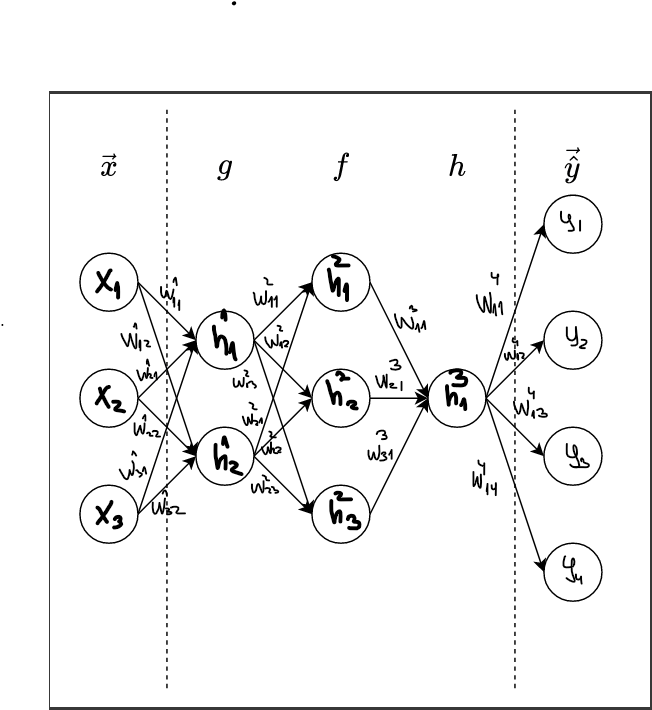

Así, para el caso particular de la red neuronal presentada anteriormente, las derivadas a calcular serían:


$$
    \vec{\delta^1_{[1]}} = g'(\vec{h^{1}_{[1]}})\cdot\left(\vec{\delta^{2}_{[1]}} \cdot W^{2}_{[1,1]} + \vec{\delta^{2}_{[2]}} \cdot W^{2}_{[1,2]} + \vec{\delta^{2}_{[3]}} \cdot W^{2}_{[1,3]} \right) \\
    \vec{\delta^1_{[2]}} = g'(\vec{h^{1}_{[2]}})\cdot\left(\vec{\delta^{2}_{[1]}} \cdot W^{2}_{[2,1]} + \vec{\delta^{2}_{[2]}} \cdot W^{2}_{[2,2]} + \vec{\delta^{2}_{[3]}} \cdot W^{2}_{[2,3]} \right) 
$$

$$
    \vec{\delta^2_{[1]}} = f'(\vec{h^{2}_{[1]}})\cdot\vec{\delta^{3}_{[1]}} \cdot W^{3}_{[1,1]} \\
    \vec{\delta^2_{[2]}} = f'(\vec{h^{2}_{[2]}})\cdot\vec{\delta^{3}_{[1]}} \cdot W^{3}_{[2,1]} \\
    \vec{\delta^2_{[3]}} = f'(\vec{h^{2}_{[3]}})\cdot\vec{\delta^{3}_{[1]}} \cdot W^{3}_{[3,1]} 
$$

$$
    \vec{\delta^3_{[1]}} = h'(\vec{h^{3}_{[1]}})\cdot\left(\vec{\delta^{4}_{[1]}} \cdot W^{4}_{[1,1]} + \vec{\delta^{4}_{[2]}} \cdot W^{4}_{[1,2]} + \vec{\delta^{4}_{[3]}} \cdot W^{4}_{[1,3]} + \vec{\delta^{4}_{[4]}} \cdot W^{4}_{[1,4]} \right) 
$$

- Donde $\vec{\delta^{4}_{[i]}}=\vec{\hat{y}}_{[i]}$, ya que la derivada de la capa superior se obtiene directamente de la función de pérdida.

## **Preguntas prácticas 💻 (3 puntos).** ##

### **Parte 3: Word Embeddings**

En la auxiliar 2 aprendieron como entrenar Word2Vec utilizando gensim. El objetivo de esta parte es comparar los embeddings obtenidos con dos modelos diferentes: Word2Vec y [FastText](https://radimrehurek.com/gensim/models/fasttext.html) (utilizen size=200 en FastText) entrenados en el mismo dataset de diálogos de los Simpson. 

In [ ]:
import re  
import pandas as pd 
from time import time  
from collections import defaultdict 
import string 
import multiprocessing
import os
import gensim
import sklearn
from sklearn import linear_model
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, classification_report

# nltk
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# word2vec
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.models.phrases import Phrases, Phraser
from sklearn.model_selection import train_test_split
import logging
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
#%config InlineBackend.figure_format = 'svg'

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Utilizando el dataset adjunto con la tarea:

In [ ]:
data_file = "dialogue-lines-of-the-simpsons.zip"
df = pd.read_csv(data_file)
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt'
).values
stopwords = Counter(stopwords.flatten().tolist())
df = df.dropna().reset_index(drop=True) # Quitar filas vacias

2021-05-24 00:02:45,241 : INFO : NumExpr defaulting to 2 threads.


**Pregunta 1**: Ayudándose de los pasos vistos en la auxiliar, entrene los modelos Word2Vec y FastText sobre el dataset anterior. **(1 punto)** (Hint, le puede servir explorar un poco los datos)

**Respuesta**:

In [ ]:
df.head(n=15)

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
8,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
9,Landlady,"Hey, hey, he Moved out this morning. He must h..."


In [ ]:
punctuation = string.punctuation + "«»“”‘’…—"
def simple_tokenizer(doc, lower=False):
    if lower:
        tokenized_doc = doc.translate(str.maketrans(
            '', '', punctuation)).lower().split()

    tokenized_doc = doc.translate(str.maketrans('', '', punctuation)).split()
    tokenized_doc = [
        token for token in tokenized_doc if token.lower() not in stopwords
    ]
    return tokenized_doc

cleaned_data = [simple_tokenizer(doc) for doc in df.spoken_words]

In [ ]:
n = 1032
print("Original doc: {}".format(df.iloc[n, 1]))
print("After tokenize: {}".format(cleaned_data[n]))

Original doc: Meditations on turning eight, by Lisa Simpson. I had a cat named Snowball -- She died, she died! Mom said she was sleeping -- She lied, she lied! Why oh why is my cat dead? Couldn't that Chrysler hit me, instead? I had a hamster named Snuffy -- He died, --
After tokenize: ['Meditations', 'Lisa', 'Simpson', 'cat', 'named', 'Snowball', 'died', 'died', 'Mom', 'sleeping', 'lied', 'lied', 'cat', 'dead', 'Chrysler', 'hit', 'hamster', 'named', 'Snuffy', 'died']


Utilizando ``Phrases`` de ``gensim`` se buscarán aquellos palabas que tengan sentido juntas y no separadas. Deben aparecer al menos 100 veces

In [ ]:
phrases = Phrases(cleaned_data, min_count = 100, progress_per = 10000)

2021-05-24 00:03:05,852 : INFO : collecting all words and their counts
2021-05-24 00:03:05,854 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2021-05-24 00:03:05,916 : INFO : PROGRESS: at sentence #10000, processed 33320 words and 32774 word types
2021-05-24 00:03:05,981 : INFO : PROGRESS: at sentence #20000, processed 67371 words and 61074 word types
2021-05-24 00:03:06,051 : INFO : PROGRESS: at sentence #30000, processed 104569 words and 91367 word types
2021-05-24 00:03:06,117 : INFO : PROGRESS: at sentence #40000, processed 138266 words and 116598 word types
2021-05-24 00:03:06,181 : INFO : PROGRESS: at sentence #50000, processed 170239 words and 140055 word types
2021-05-24 00:03:06,243 : INFO : PROGRESS: at sentence #60000, processed 200105 words and 160956 word types
2021-05-24 00:03:06,318 : INFO : PROGRESS: at sentence #70000, processed 233512 words and 184773 word types
2021-05-24 00:03:06,392 : INFO : PROGRESS: at sentence #80000, processed 268907 word

Ahora, usamos `Phraser` para re-tokenizamos el corpus con los bigramas encontrados. Es decir, juntamos los tokens separados que detectamos como frases.

In [ ]:
bigram = Phraser(phrases)
sentences = bigram[cleaned_data]

2021-05-24 00:03:07,232 : INFO : source_vocab length 327493
2021-05-24 00:03:10,395 : INFO : Phraser built with 11 phrasegrams


In [ ]:
print(sentences[1032])

['Meditations', 'Lisa', 'Simpson', 'cat', 'named', 'Snowball', 'died', 'died', 'Mom', 'sleeping', 'lied', 'lied', 'cat', 'dead', 'Chrysler', 'hit', 'hamster', 'named', 'Snuffy', 'died']


Definimos el modelo:

In [ ]:
simpsons_w2v = Word2Vec(min_count=10,
                      window=3,
                      size=200,
                      sample=6e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      workers=multiprocessing.cpu_count())

Construimos el vocabulario

In [ ]:
simpsons_w2v.build_vocab(sentences, progress_per=40000)

2021-05-24 00:03:10,992 : INFO : collecting all words and their counts
2021-05-24 00:03:10,996 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-24 00:03:11,592 : INFO : PROGRESS: at sentence #40000, processed 137471 words, keeping 27257 word types
2021-05-24 00:03:12,174 : INFO : PROGRESS: at sentence #80000, processed 267551 words, keeping 41818 word types
2021-05-24 00:03:12,766 : INFO : PROGRESS: at sentence #120000, processed 403504 words, keeping 54166 word types
2021-05-24 00:03:12,943 : INFO : collected 56639 word types from a corpus of 442276 raw words and 131853 sentences
2021-05-24 00:03:12,946 : INFO : Loading a fresh vocabulary
2021-05-24 00:03:12,982 : INFO : effective_min_count=10 retains 6503 unique words (11% of original 56639, drops 50136)
2021-05-24 00:03:12,983 : INFO : effective_min_count=10 leaves 337000 word corpus (76% of original 442276, drops 105276)
2021-05-24 00:03:13,012 : INFO : deleting the raw counts dictionary of 56639 i

Entrenamos el modelo ``Word2Vec``

In [ ]:
t = time()
simpsons_w2v.train(sentences, total_examples=simpsons_w2v.corpus_count, epochs=15, report_delay=10)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

2021-05-24 00:03:14,344 : INFO : training model with 2 workers on 6503 vocabulary and 200 features, using sg=0 hs=0 sample=6e-05 negative=20 window=3
2021-05-24 00:03:15,391 : INFO : EPOCH 1 - PROGRESS: at 40.55% examples, 80323 words/s, in_qsize 0, out_qsize 0
2021-05-24 00:03:16,889 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-05-24 00:03:16,904 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-24 00:03:16,906 : INFO : EPOCH - 1 : training on 442276 raw words (203184 effective words) took 2.5s, 79909 effective words/s
2021-05-24 00:03:17,920 : INFO : EPOCH 2 - PROGRESS: at 35.62% examples, 72925 words/s, in_qsize 1, out_qsize 0
2021-05-24 00:03:19,409 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-05-24 00:03:19,424 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-24 00:03:19,425 : INFO : EPOCH - 2 : training on 442276 raw words (203190 effective words) took 2.5s, 80876 effective wo

Time to train the model: 0.64 mins


Ahora entrenaremos el modelo ``FastText``.

Primero lo inicializamos

In [ ]:
fast_text_model = FastText(size = 200, 
                           window = 3, 
                           min_count = 10)

Creamos el vocabulario

In [ ]:
fast_text_model.build_vocab(sentences = sentences, progress_per = 40000)

2021-05-24 00:03:52,524 : INFO : collecting all words and their counts
2021-05-24 00:03:52,533 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-24 00:03:53,118 : INFO : PROGRESS: at sentence #40000, processed 137471 words, keeping 27257 word types
2021-05-24 00:03:53,690 : INFO : PROGRESS: at sentence #80000, processed 267551 words, keeping 41818 word types
2021-05-24 00:03:54,283 : INFO : PROGRESS: at sentence #120000, processed 403504 words, keeping 54166 word types
2021-05-24 00:03:54,453 : INFO : collected 56639 word types from a corpus of 442276 raw words and 131853 sentences
2021-05-24 00:03:54,454 : INFO : Loading a fresh vocabulary
2021-05-24 00:03:54,489 : INFO : effective_min_count=10 retains 6503 unique words (11% of original 56639, drops 50136)
2021-05-24 00:03:54,490 : INFO : effective_min_count=10 leaves 337000 word corpus (76% of original 442276, drops 105276)
2021-05-24 00:03:54,516 : INFO : deleting the raw counts dictionary of 56639 i

Entrenamos el modelo

In [ ]:
fast_text_model.train(sentences = sentences, total_examples = len(sentences), epochs=15)  

2021-05-24 00:03:56,690 : INFO : training model with 3 workers on 6503 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=3
2021-05-24 00:03:57,779 : INFO : EPOCH 1 - PROGRESS: at 33.30% examples, 101754 words/s, in_qsize 0, out_qsize 0
2021-05-24 00:03:58,818 : INFO : EPOCH 1 - PROGRESS: at 70.07% examples, 106278 words/s, in_qsize 0, out_qsize 0
2021-05-24 00:03:59,578 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-05-24 00:03:59,594 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-05-24 00:03:59,622 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-24 00:03:59,623 : INFO : EPOCH - 1 : training on 442276 raw words (320638 effective words) took 2.9s, 109823 effective words/s
2021-05-24 00:04:00,645 : INFO : EPOCH 2 - PROGRESS: at 30.95% examples, 101140 words/s, in_qsize 0, out_qsize 0
2021-05-24 00:04:01,716 : INFO : EPOCH 2 - PROGRESS: at 70.07% examples, 107926 words/s, in_qsize 0, out

**Pregunta 2**: Encuentre las palabras mas similares a las siguientes: Lisa, Bart, Homer, Marge. Cúal es la diferencia entre ambos resultados? Por qué ocurre esto? Intente comparar ahora Liisa en ambos modelos (doble i). Cuando escogería uno vs el otro? **(0.5 puntos)**

**Respuesta**:

Primero se debe entender el fundamento de FastText, la idea central del modelo FastText es obtener información sobre la estructura morfológica de las palabras, es por esto que se trata cada palabra como una "suma" de los caracteres que componen la palabra. Es así como la diferencia que se observa es que en Word2Vec se obtienen palabras relacionadas en base al contexto, pues el modelo trabaja en base a las palabras vecinas de una palabra central y en FastText se obtienen diferentes morfemas posibles respecto a una cierta palabra.

Dicho lo anterior, Word2Vec es más util para tareas de semántica, vale decir, donde importa el contexto de las oraciones y FastText funciona mejor para obtener información respecto a la sintáctica de las oraciones. Una ventaja de FastText es que puede obtener vectores de palabras fuera del vocabulario, a diferencia de Word2Vec que queda limitado en ese aspecto. En conclusión utilizaría Word2Vec en tareas en las cuales me importe más el contexto que las palabras por si solas y FastText cuando me importa obtener información respecto a las palabras en particular, sus conjugaciones, etc.


In [ ]:
words = ["Lisa","Bart","Homer","Marge"]
print("\t\tWord2Vec\t\tFastText")
for w in words:
    print("\nMost similar to: ",w,"\n")
    for i,j in zip(simpsons_w2v.wv.most_similar(positive = [w]), fast_text_model.wv.most_similar(positive = [w]) ):
        print(i,"\t",j)

		Word2Vec		FastText

Most similar to:  Lisa 

('Dad', 0.998372495174408) 	 ('Bart', 0.9188904762268066)
('Bart', 0.9983237981796265) 	 ('Lisas', 0.9064152240753174)
('Simpson', 0.9983171224594116) 	 ('Bartholomew', 0.8644261360168457)
('lot', 0.9981842041015625) 	 ('Lis', 0.8587274551391602)
('family', 0.9981131553649902) 	 ('Bartdude', 0.8365437984466553)
('father', 0.9980586171150208) 	 ('Abe', 0.8341927528381348)
('Marge', 0.9980097413063049) 	 ('Lie', 0.808086633682251)
('worry', 0.997908353805542) 	 ('Barts', 0.7899550795555115)
('life', 0.997888445854187) 	 ('Abraham', 0.788038969039917)
('bring', 0.997847855091095) 	 ('teacher', 0.7526736259460449)

Most similar to:  Bart 

('Marge', 0.9983499050140381) 	 ('Lisa', 0.9188905358314514)
('Lisa', 0.9983237981796265) 	 ('Bartdude', 0.8770356178283691)
('kids', 0.9982669353485107) 	 ('Bartholomew', 0.8563717603683472)
('father', 0.9981797933578491) 	 ('Lisas', 0.842789888381958)
('Dad', 0.9980261921882629) 	 ('Barts', 0.8251048326492

In [ ]:
try:
    simpsons_w2v.wv.most_similar(positive = ["Liisa"])
except:
    print("Palabra no encontrada")

Palabra no encontrada


In [ ]:
try:
    fast_text_model.wv.most_similar(positive = ["Liisa"])
except:
    print("Palabra no encontrada")

Liisa no se encuentra en el vocabulario del modelo Word2Vec. Lo cual es esperable, ya que Word2Vec no generaliza palabras y sólo quedan las del vocabulario, en cambio FastText puede hacer parecer nuevas palabras ya que las trabaja como un todo y sus caracteres importan porque se consideran los n-gramas de las palabras.

### **Parte 4: Aplicar embeddings para clasificar**

Ahora utilizaremos los embeddings que acabamos de calcular para clasificar palabras basadas en su polaridad (positivas o negativas). 

Para esto ocuparemos el lexicón AFINN incluido en la tarea, que incluye una lista de palabras y un 1 si su connotación es positiva y un -1 si es negativa.

In [ ]:
AFINN = 'AFINN_full.csv'
df_afinn = pd.read_csv(AFINN, sep='\t', header=None)

Hint: Para w2v son esperables KeyErrors debido a que no todas las palabras del corpus de los simpsons tendrán una representación en AFINN. Pueden utilizar esta función auxiliar para filtrar las filas en el dataframe que no tienen embeddings (como w2v no tiene token UNK se deben ignorar).

In [ ]:
def try_apply(model,word):
    try:
        aux = model[word]
        return True
    except KeyError:
        #logger.error('Word {} not in dictionary'.format(word))
        return False

**Pregunta 1**: Transforme las palabras del corpus de AFINN a la representación en embedding que acabamos de calcular (con ambos modelos). 

Su dataframe final debe ser del estilo [embedding, sentimiento], donde los embeddings corresponden a $X$ y el sentimiento asociado con el embedding a $y$ (positivo/negativo, 1/-1). 

Para ambos modelos, separar train y test de acuerdo a la siguiente función. **(0.75 puntos)**

**Respuesta**:

In [ ]:
X_w2v_ = []
y_w2v_ = []
X_ft_ = []
y_ft_ = []
for i in range(df_afinn.shape[0]):
    word = df_afinn.iloc[i,0]
    sentiment = df_afinn.iloc[i,1]
    if try_apply(simpsons_w2v.wv, word): 
        X_w2v_.append(simpsons_w2v.wv[word]) #Agregamos el embedding del modelo W2V si está en el voc
        y_w2v_.append(sentiment)
    if try_apply(fast_text_model.wv, word):
        X_ft_.append(fast_text_model.wv[word]) #Agregamos el embedding del modelo FastText
        y_ft_.append(sentiment)
X_w2v = pd.DataFrame({"w2v":X_w2v_,"Sentiment":y_w2v_})
X_ft = pd.DataFrame({"ft":X_ft_,"Sentiment":y_ft_})

In [ ]:
X_w2v.head()

,w2v,Sentiment
0,"[-0.06432431, 0.29449773, 0.030400103, 0.18478...",1
1,"[-0.06616183, 0.28385073, 0.024749571, 0.17422...",-1
2,"[-0.060051084, 0.29936862, 0.027454456, 0.1814...",-1
3,"[-0.05731271, 0.2945398, 0.027980272, 0.193041...",1
4,"[-0.062212, 0.29446954, 0.019557873, 0.1714464...",1


In [ ]:
X_ft.head()

,ft,Sentiment
0,"[-0.2128471, -0.08395048, -0.060172234, -0.043...",1
1,"[-0.22398695, -0.034440227, 0.23532891, -0.349...",-1
2,"[0.09618096, -0.09239344, 0.28590533, -0.15718...",1
3,"[0.0035256164, 0.019913897, 0.25987774, -0.089...",-1
4,"[-0.22593187, -0.017979816, 0.56861055, -0.012...",1


Separamos en train y test para ambos modelos

In [ ]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v_, y_w2v_, random_state=0, test_size=0.1, stratify=y_w2v_)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_ft_, y_ft_, random_state=0, test_size=0.1, stratify=y_ft_)

**Pregunta 2**: Entrenar una regresión logística (vista en auxiliar) y reportar accuracy, precision, recall, f1 y confusion_matrix para ambos modelos. Por qué se obtienen estos resultados? Cómo los mejorarías? **(0.75 puntos)**

--------------------------------------------------------------------------------
Resultados para:  Word2Vec


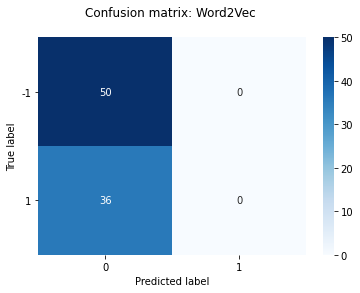

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.58      1.00      0.74        50
           1       0.00      0.00      0.00        36

    accuracy                           0.58        86
   macro avg       0.29      0.50      0.37        86
weighted avg       0.34      0.58      0.43        86

-------------------------------------------------------------------------------- 


--------------------------------------------------------------------------------
Resultados para:  FastText


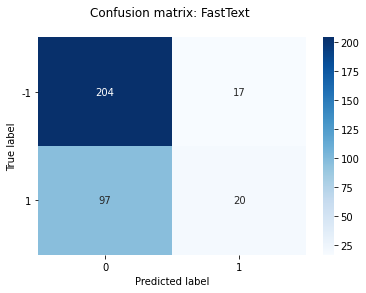

              precision    recall  f1-score   support

          -1       0.68      0.92      0.78       221
           1       0.54      0.17      0.26       117

    accuracy                           0.66       338
   macro avg       0.61      0.55      0.52       338
weighted avg       0.63      0.66      0.60       338

-------------------------------------------------------------------------------- 




In [ ]:
#Logistic Regression
clf = linear_model.LogisticRegression(max_iter = 1000000)

models = {"Word2Vec":(X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v),"FastText":(X_train_ft, X_test_ft, y_train_ft, y_test_ft)}

for model in models.keys():
    X_train, X_test, y_train, y_test = models[model]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(80*"-")
    print("Resultados para: ", model) 
    g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt = "d", yticklabels=["-1","1"])
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    plt.title('Confusion matrix: {} \n'.format(model))
    plt.xlabel('Predicted label')
    plt.ylabel('True label');   
    plt.show()
    print(classification_report(y_test, y_pred)) 
    print(80*"-","\n\n")

**Respuesta**: 

Se puede notar que al utilizar el modelo w2v disminuye notablemente la matriz de entrenamiento, ya que se omitieron aquellas palabras del lexicon que no están presentes en el vocabulario del modelo entrenado, esto puede ayudar explicar en parte los peores resultados respecto a FastText, quien contiene mayor cantidad de vocabulario al considerar los n-gramas de caracteres de las palabras.

Para mejorar los resultados se podría variar los parámetros al entrenar los modelos de embeddings, como el tamaño de la ventana k, cantidad de neuronas, etc. Incluso se podrían considerar aquellas palabras que no contienen embeddings por no estar en el vocabulario agregando un vector de ceros.

# Bonus: +0.25 puntos en cualquier pregunta

**Pregunta 1**: Replicar la parte anterior utilizando embeddings pre-entrenados en un dataset más grande y obtener mejores resultados. Les puede servir [ésta](https://radimrehurek.com/gensim/downloader.html#module-gensim.downloader) documentacion de gensim **(0.25 puntos)**.

**Respuesta**:

In [ ]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Descargamos los modelos pre-entrenados

In [ ]:
import gensim.downloader as api

model_w2v = api.load("word2vec-google-news-300")  
model_ft = api.load("fasttext-wiki-news-subwords-300")  

2021-05-22 19:38:30,086 : INFO : loading projection weights from /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2021-05-22 19:40:50,033 : INFO : loaded (3000000, 300) matrix from /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


[==================================================] 100.0% 958.5/958.4MB downloaded


2021-05-22 19:46:18,544 : INFO : fasttext-wiki-news-subwords-300 downloaded
2021-05-22 19:46:18,563 : INFO : loading projection weights from /root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz
2021-05-22 19:51:41,222 : INFO : loaded (999999, 300) matrix from /root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz


Realizamos el mismo procedimiento anterior

In [ ]:
X_w2v_pretrained_ = []
y_w2v_pretrained_ = []
X_ft_pretrained_ = []
y_ft_pretrained_ = []
for i in range(df_afinn.shape[0]):
    word = df_afinn.iloc[i,0]
    sentiment = df_afinn.iloc[i,1]
    if try_apply(model_w2v, word): 
        X_w2v_pretrained_.append(model_w2v[word]) #Agregamos el embedding del modelo W2V preentrenado si está en el vocabulario
        y_w2v_pretrained_.append(sentiment)
    if try_apply(model_ft, word): 
        X_ft_pretrained_.append(model_ft[word]) #Agregamos el embedding del modelo FastText preentrenado si está en el vocabulario
        y_ft_pretrained_.append(sentiment)

In [ ]:
X_train_w2v_pretrained, X_test_w2v_pretrained, y_train_w2v_pretrained, y_test_w2v_pretrained = train_test_split(X_w2v_pretrained_, y_w2v_pretrained_, random_state=0, test_size=0.1, stratify=y_w2v_pretrained_)
X_train_ft_pretrained, X_test_ft_pretrained, y_train_ft_pretrained, y_test_ft_pretrained = train_test_split(X_ft_pretrained_, y_ft_pretrained_, random_state=0, test_size=0.1, stratify=y_ft_pretrained_)

Entrenamos

--------------------------------------------------------------------------------
Resultados para:  word2vec-google-news-300


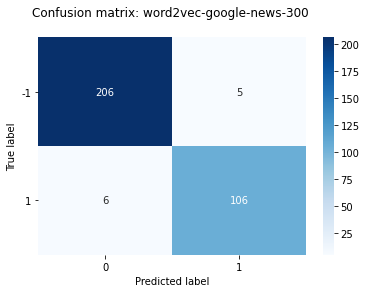

              precision    recall  f1-score   support

          -1       0.97      0.98      0.97       211
           1       0.95      0.95      0.95       112

    accuracy                           0.97       323
   macro avg       0.96      0.96      0.96       323
weighted avg       0.97      0.97      0.97       323

-------------------------------------------------------------------------------- 


--------------------------------------------------------------------------------
Resultados para:  fasttext-wiki-news-subwords-300


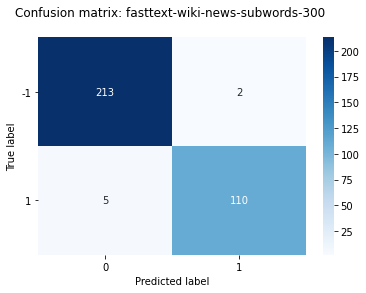

              precision    recall  f1-score   support

          -1       0.98      0.99      0.98       215
           1       0.98      0.96      0.97       115

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.98       330
weighted avg       0.98      0.98      0.98       330

-------------------------------------------------------------------------------- 




In [ ]:
#Logistic Regression
clf = linear_model.LogisticRegression(max_iter = 1000000)

models = {"word2vec-google-news-300":(X_train_w2v_pretrained, X_test_w2v_pretrained, y_train_w2v_pretrained, y_test_w2v_pretrained), "fasttext-wiki-news-subwords-300":(X_train_ft_pretrained, X_test_ft_pretrained, y_train_ft_pretrained, y_test_ft_pretrained)}

for model in models.keys():
    X_train, X_test, y_train, y_test = models[model]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(80*"-")
    print("Resultados para: ", model) 
    g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt = "d", yticklabels=["-1","1"])
    g.set_yticklabels(g.get_yticklabels(), rotation = 0)
    plt.title('Confusion matrix: {} \n'.format(model))
    plt.xlabel('Predicted label')
    plt.ylabel('True label');   
    plt.show()
    print(classification_report(y_test, y_pred)) 
    print(80*"-","\n\n")

Se puede observar que se tienen resultados mucho mejores que los anteriores, lo cual tiene sentido, pues estos embeddings están entrenados bajo corpus gigantes.